___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [21]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [3]:
#Using yahoo as remote internet source
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

BAC = yf.download('BAC', start, end)
C = yf.download('C', start, end)
GS = yf.download('GS', start, end)
JPM = yf.download('JPM', start, end)
MS = yf.download('MS', start, end)
WFC = yf.download('WFC', start, end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
BAC.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BAC,BAC,BAC,BAC,BAC,BAC
Date,,,,,,
2006-01-03 00:00:00+00:00,31.544920,47.080002,47.180000,46.150002,46.919998,16296700
2006-01-04 00:00:00+00:00,31.209896,46.580002,47.240002,46.450001,47.000000,17757900
2006-01-05 00:00:00+00:00,31.250103,46.639999,46.830002,46.320000,46.580002,14970700
2006-01-06 00:00:00+00:00,31.203184,46.570000,46.910000,46.349998,46.799999,12599800
2006-01-09 00:00:00+00:00,31.223291,46.599998,46.970001,46.360001,46.720001,15619400


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [5]:
tickers = ['BAC','C' ,'GS', 'JPM','MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [6]:
bank_stocks = pd.concat([BAC, C,GS, JPM, MS, WFC],axis=1, keys=tickers)
bank_stocks.head()

BAC                                   \
Price                      Adj Close      Close       High        Low   
Ticker                           BAC        BAC        BAC        BAC   
Date                                                                    
2006-01-03 00:00:00+00:00  31.544920  47.080002  47.180000  46.150002   
2006-01-04 00:00:00+00:00  31.209896  46.580002  47.240002  46.450001   
2006-01-05 00:00:00+00:00  31.250103  46.639999  46.830002  46.320000   
2006-01-06 00:00:00+00:00  31.203184  46.570000  46.910000  46.349998   
2006-01-09 00:00:00+00:00  31.223291  46.599998  46.970001  46.360001   

                                                         C              \
Price                           Open    Volume   Adj Close       Close   
Ticker                           BAC       BAC           C           C   
Date                                                                     
2006-01-03 00:00:00+00:00  46.919998  16296700  329.150055  492.899994   
2006-01-04 00:00:00+00:00  47.000000  17757900  323.073151  483.799988   
2006-01-05 00:00:00+00:00  46.580002  14970700  324.675873  486.200012   
2006-01-06 00:00:00+00:00  46.799999  12599800  324.675873  486.200012   
2006-01-09 00:00:00+00:00  46.720001  15619400  323.139984  483.899994   

                                                   ...         MS             \
Price                            High         Low  ...       High        Low   
Ticker                              C           C  ...         MS         MS   
Date                                               ...                         
2006-01-03 00:00:00+00:00  493.799988  481.100006  ...  58.490002  56.740002   
2006-01-04 00:00:00+00:00  491.000000  483.500000  ...  59.279999  58.349998   
2006-01-05 00:00:00+00:00  487.799988  484.000000  ...  58.590000  58.020000   
2006-01-06 00:00:00+00:00  489.000000  482.000000  ...  58.849998  58.049999   
2006-01-09 00:00:00+00:00  487.399994  483.000000  ...  59.290001  58.619999   

                                                     WFC             \
Price                           Open   Volume  Adj Close      Close   
Ticker                            MS       MS        WFC        WFC   
Date                                                                  
2006-01-03 00:00:00+00:00  57.169998  5377000  18.979563  31.900000   
2006-01-04 00:00:00+00:00  58.700001  7977800  18.759411  31.530001   
2006-01-05 00:00:00+00:00  58.549999  5778000  18.738594  31.495001   
2006-01-06 00:00:00+00:00  58.770000  6889800  18.848654  31.680000   
2006-01-09 00:00:00+00:00  58.630001  4144500  18.845684  31.674999   

                                                                      
Price                           High        Low       Open    Volume  
Ticker                           WFC        WFC        WFC       WFC  
Date                                                                  
2006-01-03 00:00:00+00:00  31.975000  31.195000  31.600000  11016400  
2006-01-04 00:00:00+00:00  31.820000  31.365000  31.799999  10870000  
2006-01-05 00:00:00+00:00  31.555000  31.309999  31.500000  10158000  
2006-01-06 00:00:00+00:00  31.775000  31.385000  31.580000   8403800  
2006-01-09 00:00:00+00:00  31.825001  31.555000  31.674999   5619600  

[5 rows x 36 columns]

** Set the column name levels (this is filled out for you):**

In [7]:
bank_stocks.columns.names= ['Stock Info', 'Price', 'Bank Ticker', ]
bank_stocks.columns.names

FrozenList(['Stock Info', 'Price', 'Bank Ticker'])

** Check the head of the bank_stocks dataframe.**

In [8]:
bank_stocks.head()

Stock Info                       BAC                                   \
Price                      Adj Close      Close       High        Low   
Bank Ticker                      BAC        BAC        BAC        BAC   
Date                                                                    
2006-01-03 00:00:00+00:00  31.544920  47.080002  47.180000  46.150002   
2006-01-04 00:00:00+00:00  31.209896  46.580002  47.240002  46.450001   
2006-01-05 00:00:00+00:00  31.250103  46.639999  46.830002  46.320000   
2006-01-06 00:00:00+00:00  31.203184  46.570000  46.910000  46.349998   
2006-01-09 00:00:00+00:00  31.223291  46.599998  46.970001  46.360001   

Stock Info                                               C              \
Price                           Open    Volume   Adj Close       Close   
Bank Ticker                      BAC       BAC           C           C   
Date                                                                     
2006-01-03 00:00:00+00:00  46.919998  16296700  329.150055  492.899994   
2006-01-04 00:00:00+00:00  47.000000  17757900  323.073151  483.799988   
2006-01-05 00:00:00+00:00  46.580002  14970700  324.675873  486.200012   
2006-01-06 00:00:00+00:00  46.799999  12599800  324.675873  486.200012   
2006-01-09 00:00:00+00:00  46.720001  15619400  323.139984  483.899994   

Stock Info                                         ...         MS             \
Price                            High         Low  ...       High        Low   
Bank Ticker                         C           C  ...         MS         MS   
Date                                               ...                         
2006-01-03 00:00:00+00:00  493.799988  481.100006  ...  58.490002  56.740002   
2006-01-04 00:00:00+00:00  491.000000  483.500000  ...  59.279999  58.349998   
2006-01-05 00:00:00+00:00  487.799988  484.000000  ...  58.590000  58.020000   
2006-01-06 00:00:00+00:00  489.000000  482.000000  ...  58.849998  58.049999   
2006-01-09 00:00:00+00:00  487.399994  483.000000  ...  59.290001  58.619999   

Stock Info                                           WFC             \
Price                           Open   Volume  Adj Close      Close   
Bank Ticker                       MS       MS        WFC        WFC   
Date                                                                  
2006-01-03 00:00:00+00:00  57.169998  5377000  18.979563  31.900000   
2006-01-04 00:00:00+00:00  58.700001  7977800  18.759411  31.530001   
2006-01-05 00:00:00+00:00  58.549999  5778000  18.738594  31.495001   
2006-01-06 00:00:00+00:00  58.770000  6889800  18.848654  31.680000   
2006-01-09 00:00:00+00:00  58.630001  4144500  18.845684  31.674999   

Stock Info                                                            
Price                           High        Low       Open    Volume  
Bank Ticker                      WFC        WFC        WFC       WFC  
Date                                                                  
2006-01-03 00:00:00+00:00  31.975000  31.195000  31.600000  11016400  
2006-01-04 00:00:00+00:00  31.820000  31.365000  31.799999  10870000  
2006-01-05 00:00:00+00:00  31.555000  31.309999  31.500000  10158000  
2006-01-06 00:00:00+00:00  31.775000  31.385000  31.580000   8403800  
2006-01-09 00:00:00+00:00  31.825001  31.555000  31.674999   5619600  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [9]:
for ticker in tickers:
    print(ticker, bank_stocks[ticker]['Close'].max())

BAC Bank Ticker
BAC    54.900002
dtype: float64
C Bank Ticker
C    564.099976
dtype: float64
GS Bank Ticker
GS    247.919998
dtype: float64
JPM Bank Ticker
JPM    70.080002
dtype: float64
MS Bank Ticker
MS    89.300003
dtype: float64
WFC Bank Ticker
WFC    58.52
dtype: float64


** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [13]:
returns = pd.DataFrame()
bank_stocks.head()

Stock Info                       BAC                                   \
Price                      Adj Close      Close       High        Low   
Bank Ticker                      BAC        BAC        BAC        BAC   
Date                                                                    
2006-01-03 00:00:00+00:00  31.544920  47.080002  47.180000  46.150002   
2006-01-04 00:00:00+00:00  31.209896  46.580002  47.240002  46.450001   
2006-01-05 00:00:00+00:00  31.250103  46.639999  46.830002  46.320000   
2006-01-06 00:00:00+00:00  31.203184  46.570000  46.910000  46.349998   
2006-01-09 00:00:00+00:00  31.223291  46.599998  46.970001  46.360001   

Stock Info                                               C              \
Price                           Open    Volume   Adj Close       Close   
Bank Ticker                      BAC       BAC           C           C   
Date                                                                     
2006-01-03 00:00:00+00:00  46.919998  16296700  329.150055  492.899994   
2006-01-04 00:00:00+00:00  47.000000  17757900  323.073151  483.799988   
2006-01-05 00:00:00+00:00  46.580002  14970700  324.675873  486.200012   
2006-01-06 00:00:00+00:00  46.799999  12599800  324.675873  486.200012   
2006-01-09 00:00:00+00:00  46.720001  15619400  323.139984  483.899994   

Stock Info                                         ...         MS             \
Price                            High         Low  ...       High        Low   
Bank Ticker                         C           C  ...         MS         MS   
Date                                               ...                         
2006-01-03 00:00:00+00:00  493.799988  481.100006  ...  58.490002  56.740002   
2006-01-04 00:00:00+00:00  491.000000  483.500000  ...  59.279999  58.349998   
2006-01-05 00:00:00+00:00  487.799988  484.000000  ...  58.590000  58.020000   
2006-01-06 00:00:00+00:00  489.000000  482.000000  ...  58.849998  58.049999   
2006-01-09 00:00:00+00:00  487.399994  483.000000  ...  59.290001  58.619999   

Stock Info                                           WFC             \
Price                           Open   Volume  Adj Close      Close   
Bank Ticker                       MS       MS        WFC        WFC   
Date                                                                  
2006-01-03 00:00:00+00:00  57.169998  5377000  18.979563  31.900000   
2006-01-04 00:00:00+00:00  58.700001  7977800  18.759411  31.530001   
2006-01-05 00:00:00+00:00  58.549999  5778000  18.738594  31.495001   
2006-01-06 00:00:00+00:00  58.770000  6889800  18.848654  31.680000   
2006-01-09 00:00:00+00:00  58.630001  4144500  18.845684  31.674999   

Stock Info                                                            
Price                           High        Low       Open    Volume  
Bank Ticker                      WFC        WFC        WFC       WFC  
Date                                                                  
2006-01-03 00:00:00+00:00  31.975000  31.195000  31.600000  11016400  
2006-01-04 00:00:00+00:00  31.820000  31.365000  31.799999  10870000  
2006-01-05 00:00:00+00:00  31.555000  31.309999  31.500000  10158000  
2006-01-06 00:00:00+00:00  31.775000  31.385000  31.580000   8403800  
2006-01-09 00:00:00+00:00  31.825001  31.555000  31.674999   5619600  

[5 rows x 36 columns]

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [24]:
for ticker in tickers:
   returns[ticker + ' returns'] =  (bank_stocks[ticker]['Close']).pct_change() 


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

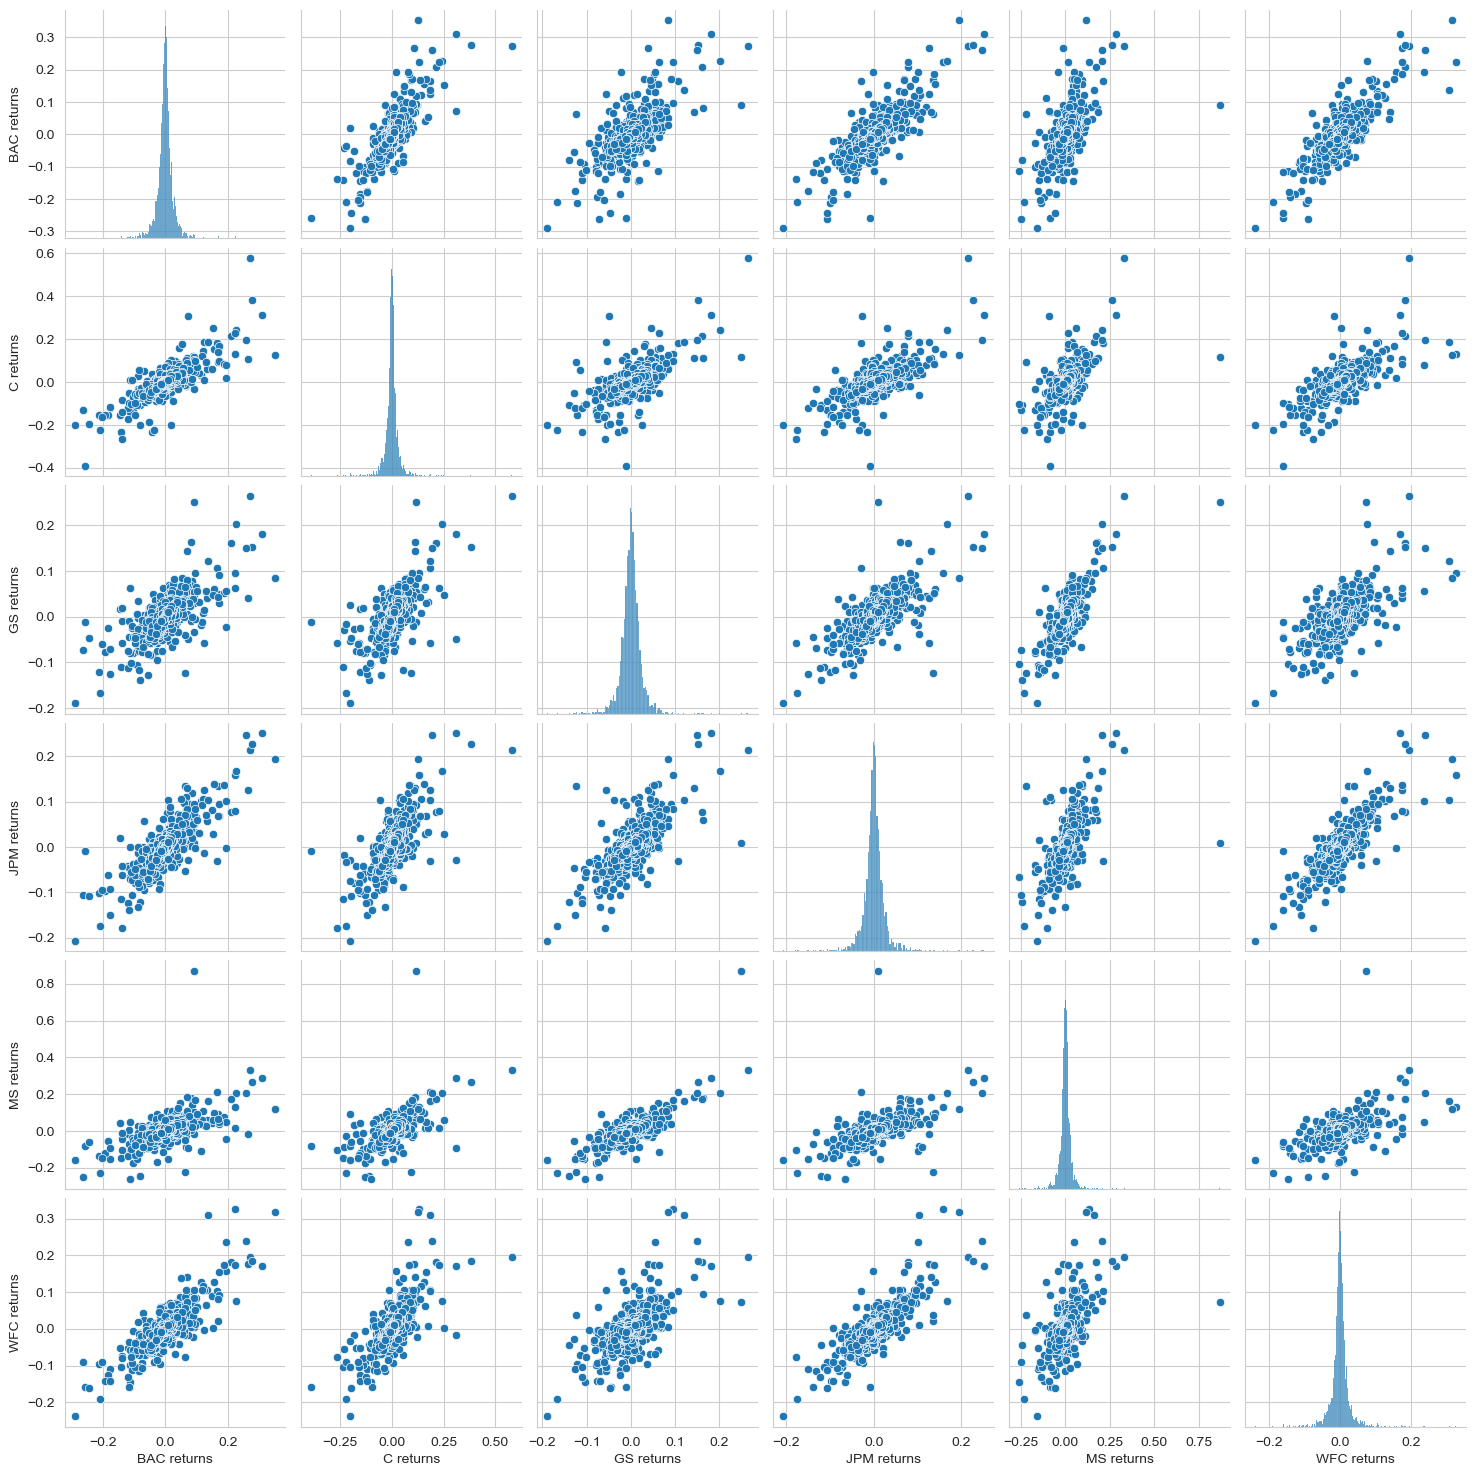

In [23]:
sns.pairplot(returns[1:])
plt.show()

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [38]:
# for ticker in tickers:
#     print(ticker , returns[returns[ticker +' returns'] == returns[ticker +' returns'].min()].index)


#OR BETTER:

returns.idxmin()

BAC returns   2009-01-20 00:00:00+00:00
C returns     2009-02-27 00:00:00+00:00
GS returns    2009-01-20 00:00:00+00:00
JPM returns   2009-01-20 00:00:00+00:00
MS returns    2008-10-09 00:00:00+00:00
WFC returns   2009-01-20 00:00:00+00:00
dtype: datetime64[ns, UTC]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [39]:
returns.idxmax()

BAC returns   2009-04-09 00:00:00+00:00
C returns     2008-11-24 00:00:00+00:00
GS returns    2008-11-24 00:00:00+00:00
JPM returns   2009-01-21 00:00:00+00:00
MS returns    2008-10-13 00:00:00+00:00
WFC returns   2008-07-16 00:00:00+00:00
dtype: datetime64[ns, UTC]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [41]:
returns.std()

BAC returns    0.036647
C returns      0.038672
GS returns     0.025390
JPM returns    0.027667
MS returns     0.037819
WFC returns    0.030238
dtype: float64

In [42]:
returns.head()

,BAC returns,C returns,GS returns,JPM returns,MS returns,WFC returns
Date,,,,,,
2006-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04 00:00:00+00:00,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05 00:00:00+00:00,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06 00:00:00+00:00,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09 00:00:00+00:00,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\rites\AppData\Local\Temp\ipykernel_15728\412277624.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




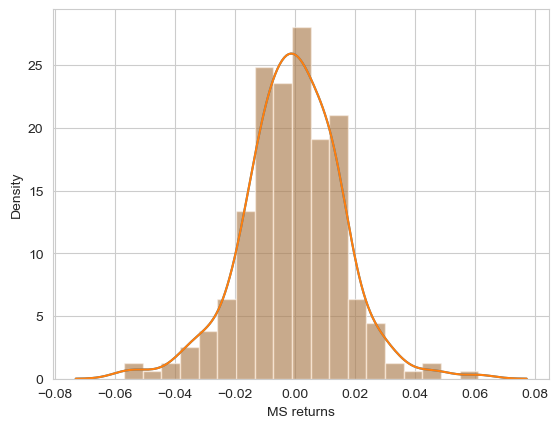

In [55]:
sns.distplot(returns.loc['2015']['MS returns'])
plt.show()

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\rites\AppData\Local\Temp\ipykernel_15728\4026260758.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




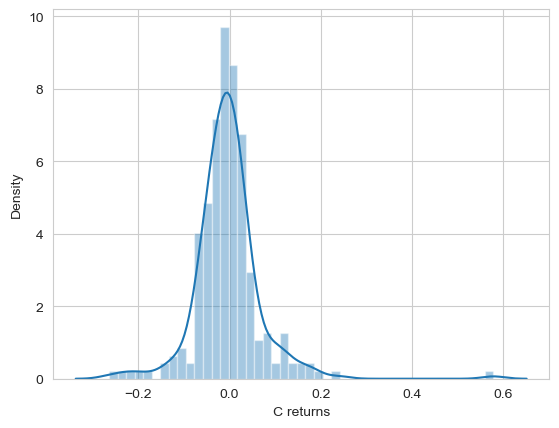

In [56]:
sns.distplot(returns.loc['2008']['C returns'])
plt.show()

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [68]:
bank_stocks.head()

Stock Info                       BAC                                   \
Price                      Adj Close      Close       High        Low   
Bank Ticker                      BAC        BAC        BAC        BAC   
Date                                                                    
2006-01-03 00:00:00+00:00  31.544920  47.080002  47.180000  46.150002   
2006-01-04 00:00:00+00:00  31.209896  46.580002  47.240002  46.450001   
2006-01-05 00:00:00+00:00  31.250103  46.639999  46.830002  46.320000   
2006-01-06 00:00:00+00:00  31.203184  46.570000  46.910000  46.349998   
2006-01-09 00:00:00+00:00  31.223291  46.599998  46.970001  46.360001   

Stock Info                                               C              \
Price                           Open    Volume   Adj Close       Close   
Bank Ticker                      BAC       BAC           C           C   
Date                                                                     
2006-01-03 00:00:00+00:00  46.919998  16296700  329.150055  492.899994   
2006-01-04 00:00:00+00:00  47.000000  17757900  323.073151  483.799988   
2006-01-05 00:00:00+00:00  46.580002  14970700  324.675873  486.200012   
2006-01-06 00:00:00+00:00  46.799999  12599800  324.675873  486.200012   
2006-01-09 00:00:00+00:00  46.720001  15619400  323.139984  483.899994   

Stock Info                                         ...         MS             \
Price                            High         Low  ...       High        Low   
Bank Ticker                         C           C  ...         MS         MS   
Date                                               ...                         
2006-01-03 00:00:00+00:00  493.799988  481.100006  ...  58.490002  56.740002   
2006-01-04 00:00:00+00:00  491.000000  483.500000  ...  59.279999  58.349998   
2006-01-05 00:00:00+00:00  487.799988  484.000000  ...  58.590000  58.020000   
2006-01-06 00:00:00+00:00  489.000000  482.000000  ...  58.849998  58.049999   
2006-01-09 00:00:00+00:00  487.399994  483.000000  ...  59.290001  58.619999   

Stock Info                                           WFC             \
Price                           Open   Volume  Adj Close      Close   
Bank Ticker                       MS       MS        WFC        WFC   
Date                                                                  
2006-01-03 00:00:00+00:00  57.169998  5377000  18.979563  31.900000   
2006-01-04 00:00:00+00:00  58.700001  7977800  18.759411  31.530001   
2006-01-05 00:00:00+00:00  58.549999  5778000  18.738594  31.495001   
2006-01-06 00:00:00+00:00  58.770000  6889800  18.848654  31.680000   
2006-01-09 00:00:00+00:00  58.630001  4144500  18.845684  31.674999   

Stock Info                                                            
Price                           High        Low       Open    Volume  
Bank Ticker                      WFC        WFC        WFC       WFC  
Date                                                                  
2006-01-03 00:00:00+00:00  31.975000  31.195000  31.600000  11016400  
2006-01-04 00:00:00+00:00  31.820000  31.365000  31.799999  10870000  
2006-01-05 00:00:00+00:00  31.555000  31.309999  31.500000  10158000  
2006-01-06 00:00:00+00:00  31.775000  31.385000  31.580000   8403800  
2006-01-09 00:00:00+00:00  31.825001  31.555000  31.674999   5619600  

[5 rows x 36 columns]

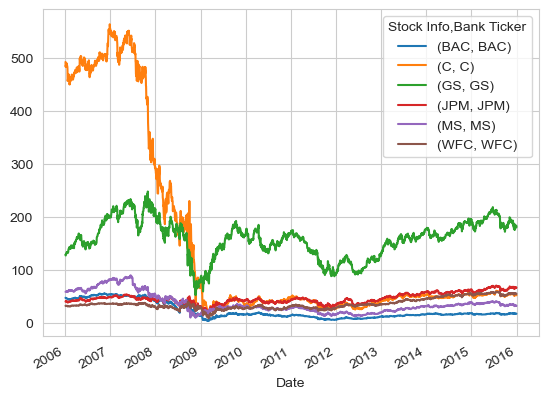

In [77]:
# for ticker in tickers:
#     bank_stocks[ticker]['Close'].plot(label = ticker, figsize = (12,4))

# plt.show()

#OR

bank_stocks.xs(key='Close', axis=1, level='Price').plot()
plt.show()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [73]:
bank_stocks['BAC'].loc['2008']

Price,Adj Close,Close,High,Low,Open,Volume
Bank Ticker,BAC,BAC,BAC,BAC,BAC,BAC
Date,,,,,,
2008-01-02 00:00:00+00:00,29.781345,40.560001,41.549999,40.349998,41.529999,30764600
2008-01-03 00:00:00+00:00,29.590435,40.299999,40.810001,40.250000,40.630001,22589500
2008-01-04 00:00:00+00:00,29.260025,39.849998,40.290001,39.759998,40.000000,34921700
2008-01-07 00:00:00+00:00,29.296721,39.900002,40.240002,39.259998,40.049999,31884400
2008-01-08 00:00:00+00:00,28.202698,38.410000,40.209999,38.279999,40.180000,42143300
...,...,...,...,...,...,...
2008-12-24 00:00:00+00:00,10.744346,13.530000,13.560000,12.740000,12.750000,38022300
2008-12-26 00:00:00+00:00,10.609350,13.360000,13.800000,13.290000,13.660000,43646200


** Create a heatmap of the correlation between the stocks Close Price.**

** Optional: Use seaborn's clustermap to cluster the correlations together:**

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.